In [1]:
import sys
import nltk
import sklearn
import pandas as pd
import numpy as np
from sklearn.utils import shuffle


In [2]:
# load the dataset
raw_data= pd.read_csv('./Data/yelpreview021302.csv')

In [3]:
raw_data.head(5)

,reviewid,reviewerid,businessid,reviewcontent,reviewrating,reusefulcount,recoolcount,refunnycount,reviewDate,yelpjoindate,...,buscateg,pricerange,filreviewcount,monmembership,firstreview,maxReviewDay,avgReviewDay,avgpostedrating,avgreviewlen,flagged
0,LGCYk,KJmXsA1zFPH-n6r14JcYLw,SfRCNiCTPfGwzHEM_hCVZQ,I came here with a group of people for a birth...,4,0,0,0,4/30/2012,00:00.0,...,Hotels,2.0,6,46,0,7,1,3,711,N
1,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,"Unlike Next, which we'd eaten at the previous ...",5,0,0,0,9/22/2012,00:00.0,...,Restaurants,4.0,0,36,0,6,1,3,1320,N
2,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,Probably one of the best meals I've had ever. ...,5,0,0,0,9/22/2012,00:00.0,...,Restaurants,4.0,0,15,0,4,2,4,241,N
3,V0PU0ciEBeNiHHS1,-3Mzc2O6jmYLWQJcIJdvAA,pbEiXam9YJL3neCYHGwLUA,Today marks one year since my dinner at Alinea...,5,1,1,0,9/11/2012,00:00.0,...,Restaurants,4.0,0,64,0,4,1,3,1108,N
4,tOC0u8KRXVJdYT9mFTEwvw,lXG7Mbhi6_nXaTZojpneUg,pbEiXam9YJL3neCYHGwLUA,Best restaurant I have ever visited in the Uni...,5,0,0,0,7/2/2012,00:00.0,...,Restaurants,4.0,0,0,0,16,2,3,789,N


In [4]:

# repalce NR = N, YR =Y
#raw_data[['flagged']]= raw_data[['flagged']].replace('NR','N')
#raw_data[['flagged']]= raw_data[['flagged']].replace('YR','Y')
raw_data = raw_data.loc[(raw_data['flagged'] !='NR') & (raw_data['flagged']!='YR') ]


#seed = 138
#raw_data = shuffle(raw_data, seed)
raw_data.head(5)

,reviewid,reviewerid,businessid,reviewcontent,reviewrating,reusefulcount,recoolcount,refunnycount,reviewDate,yelpjoindate,...,buscateg,pricerange,filreviewcount,monmembership,firstreview,maxReviewDay,avgReviewDay,avgpostedrating,avgreviewlen,flagged
0,LGCYk,KJmXsA1zFPH-n6r14JcYLw,SfRCNiCTPfGwzHEM_hCVZQ,I came here with a group of people for a birth...,4,0,0,0,4/30/2012,00:00.0,...,Hotels,2.0,6,46,0,7,1,3,711,N
1,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,"Unlike Next, which we'd eaten at the previous ...",5,0,0,0,9/22/2012,00:00.0,...,Restaurants,4.0,0,36,0,6,1,3,1320,N
2,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,Probably one of the best meals I've had ever. ...,5,0,0,0,9/22/2012,00:00.0,...,Restaurants,4.0,0,15,0,4,2,4,241,N
3,V0PU0ciEBeNiHHS1,-3Mzc2O6jmYLWQJcIJdvAA,pbEiXam9YJL3neCYHGwLUA,Today marks one year since my dinner at Alinea...,5,1,1,0,9/11/2012,00:00.0,...,Restaurants,4.0,0,64,0,4,1,3,1108,N
4,tOC0u8KRXVJdYT9mFTEwvw,lXG7Mbhi6_nXaTZojpneUg,pbEiXam9YJL3neCYHGwLUA,Best restaurant I have ever visited in the Uni...,5,0,0,0,7/2/2012,00:00.0,...,Restaurants,4.0,0,0,0,16,2,3,789,N


In [5]:
#df = raw_data.sample(5000).groupby('flagged').head(5000)
#

fn = lambda obj: obj.loc[np.random.choice(obj.index, 5000, True),:]
df = raw_data.groupby('flagged', as_index=False).apply(fn)
df.reset_index(drop=True, inplace=True)



In [6]:
df[['flagged','buscateg','pricerange','firstreview']].head(10)

,flagged,buscateg,pricerange,firstreview
0,N,Restaurants,2.0,0
1,N,Restaurants,3.0,0
2,N,Restaurants,3.0,0
3,N,Restaurants,2.0,0
4,N,Restaurants,2.0,0
5,N,Restaurants,3.0,0
6,N,Restaurants,2.0,0
7,N,Restaurants,2.0,0
8,N,Restaurants,3.0,0
9,N,Restaurants,3.0,0


# 2 EAD

i have to do EAD in this steps
all cleanning step will be implement in SQL server

something need to show in EAD:
- summarise statistic
- proportion of fake and non fake in dataset
- the relation between "flagged and other feature"

## 2.1 Sumarize statistic

In [7]:
# Summarize statistic
print(round(df.describe(),2))
df.isna().sum()

       reviewrating  reusefulcount  recoolcount  refunnycount  friendcount  \
count      10000.00       10000.00     10000.00      10000.00     10000.00   
mean           3.81           0.45         0.26          0.24        35.77   
std            1.31           1.72         1.34          1.34       199.98   
min            1.00           0.00         0.00          0.00         0.00   
25%            3.00           0.00         0.00          0.00         0.00   
50%            4.00           0.00         0.00          0.00         1.00   
75%            5.00           0.00         0.00          0.00        14.00   
max            5.00          57.00        52.00         54.00      4924.00   

       fancount  tipcount  reviewcount  firstcount  usefulcount  ...  \
count  10000.00  10000.00     10000.00    10000.00     10000.00  ...   
mean       3.56      9.72        64.96        4.62       138.70  ...   
std       24.35     56.22       168.03       21.24       870.34  ...   
min      

reviewid           0
reviewerid         0
businessid         0
reviewcontent      0
reviewrating       0
reusefulcount      0
recoolcount        0
refunnycount       0
reviewDate         0
yelpjoindate       0
friendcount        0
fancount           0
tipcount           0
reviewcount        0
firstcount         0
usefulcount        0
coolcount          0
complimentcount    0
funnycount         0
busrating          0
buscateg           0
pricerange         1
filreviewcount     0
monmembership      0
firstreview        0
maxReviewDay       0
avgReviewDay       0
avgpostedrating    0
avgreviewlen       0
flagged            0
dtype: int64

In [8]:
df['pricerange'] = df['pricerange'].fillna(0.0)

In [9]:
# checking data distribution
Y = df['flagged']

print(Y.value_counts())

print('% filtered reviews: {}'.format(round(Y.value_counts()[0]/len(Y)*100),3))
print('% non-filtered reviews: {}'.format(round(Y.value_counts()[1]/len(Y)*100),2))

N    5000
Y    5000
Name: flagged, dtype: int64
% filtered reviews: 50.0
% non-filtered reviews: 50.0


# 3. Data Preprocessing
## 3.1 Text data

steps:
- generate new fields: look at notebook
    + review length
    + ...
- text feature genereate: n-gram, POS, Bag of words, TF-IDF
- sentiment analysis
- opinion mining
- integrate text feature back to the dataframe


In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
# store the sms message data to diff dataframe
df['flagged'] = df['flagged'].astype('category')
df['buscateg'] = df['buscateg'].astype('category')
df['pricerange'] = df['pricerange'].astype('category')
df['firstreview'] = df['firstreview'].astype('category')


review_content = df['reviewcontent']
behavior_attr = df[['reviewrating',
                    'reusefulcount',
                    'recoolcount',
                    'refunnycount',
                    'friendcount',
                    'fancount',
                    'tipcount',
                    'reviewcount',
                    'firstcount',
                    'usefulcount',
                    'coolcount',
                    'complimentcount',
                    'funnycount',
                    'busrating',
                    'buscateg',
                    'pricerange',
                    'monmembership',
                    'firstreview',
                    'maxReviewDay',
                    'avgReviewDay',
                    'avgpostedrating',
                    'avgreviewlen'
                    ]]

# replace NaN with space
review_content = review_content.fillna('')



# convert class labels to binary values, 0 = ham and 1 = spam
encoder = LabelEncoder()
Y = encoder.fit_transform(df['flagged'])

behavior_attr['buscateg'] =  encoder.fit_transform(behavior_attr['buscateg'])
behavior_attr['pricerange'] = encoder.fit_transform(behavior_attr['pricerange'])
behavior_attr['firstreview'] = encoder.fit_transform(behavior_attr['firstreview'])

print(review_content[:10])

0    I'm really glad RevBrew opened up in the neigh...
1    Client dinner and wow what a treat. Food was a...
2    I've been to Sunda twice now. First time was f...
3    Decided to finally check out Cafe 28 after rea...
4    My hubby and I went in on Saturday night to ce...
5    I adore the entire concept that Violet Hour re...
6    We went to Chicago Q today (opening day) at ar...
7    I took my parents and grandparents here when t...
8    Met my friend for a dinner to catch up before ...
9    ************* REVIEW 144 **************** I've...
Name: reviewcontent, dtype: object


C:\Users\quoch\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\quoch\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\quoch\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [12]:
Y.shape

(10000,)

In [14]:
# use regular expressions to replace email address, URLs, Phone numbers, other numbers

# Replace email addresses with 'email'
processed = review_content.str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                      'emailaddress')

# Replace URLs with 'webaddress'
processed = processed.str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                   'webaddress')

# Replace moneu symbols with 'moneysymb' (€,£)
processed = processed.str.replace(r'€|\$|£', 'moneysymb')

# replac 10 digit phone numbers (formats include paranthesis, space, no space, dashes) with phonenumber
processed = processed.str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                 'phonenumber')

#replace numbers with 'number'
processed = processed.str.replace(r'\d+(\.\d+)?','number')

In [15]:
# Remove Punctuation
processed = processed.str.replace(r'[^\w\d\s]', ' ')

# replace whitespac between terms with a single space
processed = processed.str.replace(r'\s+',' ') 

# remove leading and trailing whitespace
processed = processed.str.replace(r'^\s+|\s+?$','')

In [16]:
# change words to lower case
processed = processed.str.lower()
print(processed)

0       i m really glad revbrew opened up in the neigh...
1       client dinner and wow what a treat food was ab...
2       i ve been to sunda twice now first time was fo...
3       decided to finally check out cafe number after...
4       my hubby and i went in on saturday night to ce...
5       i adore the entire concept that violet hour re...
6       we went to chicago q today opening day at arou...
7       i took my parents and grandparents here when t...
8       met my friend for a dinner to catch up before ...
9       review number i ve been coming here for number...
10      carrie m s response to my review on number num...
11      definitely one of the best locations on michig...
12      great place to eat they tell you its like ital...
13      drinks bar in town for my significant others c...
14      went to glenn s diner for lunch and it was gre...
15      i loved this place it was a lot bigger then ex...
16      wife and i were taking a bucket list train tou...
17      so im 

In [17]:
# remove stopwords from text sms
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

processed = processed.apply(lambda x: ' '.join(
            term for term in x.split() if term not in stop_words))

In [18]:
print(processed)

0       really glad revbrew opened neighborhood craft ...
1       client dinner wow treat food absolutely fantas...
2       sunda twice first time dinner second time sund...
3       decided finally check cafe number reading huge...
4       hubby went saturday night celebrate late valen...
5       adore entire concept violet hour represents da...
6       went chicago q today opening day around number...
7       took parents grandparents came town grandparen...
8       met friend dinner catch turkey day last week c...
9       review number coming number years dinner cockt...
10      carrie response review number number number in...
11      definitely one best locations michigan avenue ...
12      great place eat tell like italian tapas slight...
13      drinks bar town significant others conference ...
14      went glenn diner lunch great disappointed coul...
15      loved place lot bigger expected food amazing i...
16      wife taking bucket list train tour us arrived ...
17      im big

In [19]:
# remove word stems using a Porter stemmer
ps = nltk.PorterStemmer()

processed = processed.apply(lambda x: ' '.join(
            ps.stem(term) for term in x.split()))


In [19]:
processed.to_csv('processed_content.csv')

C:\Users\quoch\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


# 4 Generate Text features
## 4.1 Bag of Words
### a. all words


In [293]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
BoW = vectorizer.fit_transform(processed)
BowColName = vectorizer.get_feature_names()

In [294]:
#Bag of words after processed
pd.DataFrame(BoW.toarray(),columns = vectorizer.get_feature_names()).head(10)

,_never_,aa,aaa,aaaah,aaaahhhh,aaamazing,aaanyway,aaron,aarp,aback,...,ztejas,ztinky,zucca,zucchini,zuke,zupa,zuppa,zurich,økologisk,øl
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### b. 1500 most frequent words

In [295]:

from nltk.tokenize import word_tokenize
# create bag of words
all_words =[]
for message in processed: # it should be text content column in other df
    words = word_tokenize(message)
    for w in words:
        all_words.append(w)
        


In [ ]:
print(all_words)

In [296]:
all_words = nltk.FreqDist(all_words)
print(all_words.most_common(1500))

[('number', 5442), ('good', 4056), ('food', 3714), ('place', 3412), ('like', 2797), ('great', 2321), ('one', 2213), ('get', 2078), ('really', 2024), ('service', 1868), ('time', 1824), ('would', 1794), ('go', 1754), ('back', 1628), ('also', 1603), ('moneysymbnumber', 1495), ('nice', 1395), ('got', 1272), ('restaurant', 1266), ('pretty', 1252), ('little', 1243), ('us', 1231), ('chicken', 1220), ('well', 1196), ('menu', 1171), ('much', 1142), ('ordered', 1142), ('best', 1091), ('even', 1059), ('order', 1024), ('delicious', 1021), ('love', 1014), ('try', 1013), ('came', 996), ('sauce', 963), ('could', 961), ('bar', 943), ('think', 935), ('cheese', 890), ('people', 879), ('definitely', 875), ('better', 872), ('night', 870), ('went', 868), ('table', 856), ('two', 847), ('way', 836), ('pizza', 825), ('know', 823), ('first', 820), ('come', 816), ('meal', 784), ('lunch', 781), ('dinner', 780), ('made', 777), ('eat', 769), ('bit', 768), ('make', 767), ('salad', 754), ('fresh', 753), ('wait', 748

In [297]:
# see the 1500 most common words 
print('Number of words: {}'.format(len(all_words)))
print('Most common words: {}'.format(all_words.most_common(15)))
lst_commonwords = all_words.most_common(1500)
word_features_df = pd.DataFrame(lst_commonwords, columns = ['Word', 'Count'])

Number of words: 22347
Most common words: [('number', 5442), ('good', 4056), ('food', 3714), ('place', 3412), ('like', 2797), ('great', 2321), ('one', 2213), ('get', 2078), ('really', 2024), ('service', 1868), ('time', 1824), ('would', 1794), ('go', 1754), ('back', 1628), ('also', 1603)]


In [298]:
word_features_df.head(10)

,Word,Count
0,number,5442
1,good,4056
2,food,3714
3,place,3412
4,like,2797
5,great,2321
6,one,2213
7,get,2078
8,really,2024
9,service,1868


In [299]:
# the find_features function will determin which of the 1500 word features are contained in the review
def find_features(message):
    words = word_tokenize(message)
    features = {}
    for word in word_features_df['Word']:
        features[word] = 1 if (word in words) else 0
    return features

# example
features =  find_features(processed[0])
for key, value in features.items():
    if value == True:
        print(key)

good
food
get
wait
small
long
space
early


In [300]:
# generating feature for all the messages
messages = list(zip(processed, Y))


In [301]:
# Bag of Words with 1500 most commonwords
# call find_features function for each sms:
featuresets_bow = [(find_features(text), label) for (text, label) in messages]
print(featuresets_bow[:1])

[({'number': 0, 'good': 1, 'food': 1, 'place': 0, 'like': 0, 'great': 0, 'one': 0, 'get': 1, 'really': 0, 'service': 0, 'time': 0, 'would': 0, 'go': 0, 'back': 0, 'also': 0, 'moneysymbnumber': 0, 'nice': 0, 'got': 0, 'restaurant': 0, 'pretty': 0, 'little': 0, 'us': 0, 'chicken': 0, 'well': 0, 'menu': 0, 'much': 0, 'ordered': 0, 'best': 0, 'even': 0, 'order': 0, 'delicious': 0, 'love': 0, 'try': 0, 'came': 0, 'sauce': 0, 'could': 0, 'bar': 0, 'think': 0, 'cheese': 0, 'people': 0, 'definitely': 0, 'better': 0, 'night': 0, 'went': 0, 'table': 0, 'two': 0, 'way': 0, 'pizza': 0, 'know': 0, 'first': 0, 'come': 0, 'meal': 0, 'lunch': 0, 'dinner': 0, 'made': 0, 'eat': 0, 'bit': 0, 'make': 0, 'salad': 0, 'fresh': 0, 'wait': 1, 'always': 0, 'though': 0, 'right': 0, 'room': 0, 'friendly': 0, 'day': 0, 'still': 0, 'around': 0, 'area': 0, 'never': 0, 'say': 0, 'hot': 0, 'want': 0, 'going': 0, 'dish': 0, 'since': 0, 'sure': 0, 'everything': 0, 'something': 0, 'small': 1, 'side': 0, 'staff': 0, 'next

## 4.2 Part of Speech

In [20]:
from nltk import word_tokenize, pos_tag
#tokenized review into word
#word_tok = processed.apply(word_tokenize)
#print(word_tok.head(10))


In [54]:
# [('I', 'PRP'), ("'m", 'VBP'), ('learning', 'VBG'), ('NLP', 'NNP')]
pos = processed.apply(word_tokenize).apply(pos_tag)

In [55]:
for i, sent in enumerate(pos):
    pos[i] =' '.join([word + '_' + postag for word, postag in sent])

In [56]:
print(pos[:10])


0    realli_NN glad_NN revbrew_VBD open_JJ neighbor...
1    client_NN dinner_NN wow_JJ treat_NN food_NN ab...
2    sunda_NN twice_RB first_JJ time_NN dinner_NN s...
3    decid_JJ final_JJ check_NN cafe_JJ number_NN r...
4    hubbi_NN went_VBD saturday_JJ night_NN celebr_...
5    ador_NN entir_NN concept_NN violet_FW hour_NN ...
6    went_VBD chicago_NN q_NN today_NN open_JJ day_...
7    took_VBD parent_NN grandpar_NN came_VBD town_N...
8    met_VBN friend_NN dinner_NN catch_VBP turkey_N...
9    review_NN number_NN come_VBN number_NN year_NN...
Name: reviewcontent, dtype: object


## 4.3 Cosine Similarity


In [57]:
# ML Packages For Vectorization of Text For Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

### a. Cosine Similarity by N-grams

In [21]:
corpus = processed
# using bi-gram
#cv = CountVectorizer(analyzer='word', ngram_range=(2, 2))
#X_cv = cv.fit_transform(corpus) # Fit the Data
# create fi-idf vector
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(2, 2))
X_tfidf= tfidf.fit_transform(corpus)

In [126]:
X_tfidf.name

NameError: name 'X_tfidf' is not defined

In [22]:
# create cosine similarity by tf-idf vector
CS_similarity_bigram =cosine_similarity(X_tfidf)

In [24]:
# get the feature shape
CS_similarity_bigram.shape

(10000, 10000)

In [25]:
CS_similarity_bigram

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.00917963],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.00917963, ..., 0.        , 0.        ,
        1.        ]])

In [143]:
del CS_similarity_bigram

### b. Cosine Similarity by Part of Speech

In [74]:
corpus = pos
# create fi-idf vector base on POS
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 1))
pos_tfidf= tfidf.fit_transform(corpus)

print(pos_tfidf.shape)

(10000, 31938)


In [75]:
tfidf.get_feature_names()

['__nnp',
 '_wrong__jj',
 'aa_in',
 'aa_nn',
 'aa_vb',
 'aaa_nn',
 'aaaaaaaaaggggh_nn',
 'aaaand_nn',
 'aaargh_in',
 'aahhhh_nn',
 'aaron_jj',
 'aaron_nn',
 'aaron_vbp',
 'aback_rb',
 'abandon_in',
 'abandon_jj',
 'abandon_nn',
 'abat_nn',
 'abbey_jj',
 'abbi_nn',
 'aberr_jj',
 'abgreat_nn',
 'abid_vb',
 'abil_in',
 'abil_jj',
 'abil_nn',
 'abil_rb',
 'abil_vbd',
 'abject_vbp',
 'abl_fw',
 'abl_in',
 'abl_jj',
 'abl_nn',
 'abl_nns',
 'abl_rb',
 'abl_vb',
 'abl_vbd',
 'abl_vbp',
 'abl_vbz',
 'abod_nn',
 'abort_nn',
 'abound_in',
 'abound_jj',
 'abound_nn',
 'aboutthat_rb',
 'abovement_nn',
 'abra_jj',
 'abras_jj',
 'abroad_rb',
 'abrupt_jj',
 'abrupt_vbp',
 'abruptli_vb',
 'abruzzo_rb',
 'abscond_nn',
 'absenc_jj',
 'absenc_nn',
 'absent_jj',
 'absinth_jj',
 'absinth_nn',
 'abso_nn',
 'absolut_fw',
 'absolut_in',
 'absolut_jj',
 'absolut_nn',
 'absolut_nns',
 'absolut_rb',
 'absolut_vb',
 'absolut_vbd',
 'absolut_vbp',
 'absolut_vbz',
 'absolutley_nn',
 'absolutli_in',
 'absorb_jj',
 'a

In [76]:
import time

In [77]:
import time
start_time = time.time()

# create cosine similarity by tf-idf vector
CS_similarity_pos =cosine_similarity(pos_tfidf)

print("--- %s seconds ---" % (time.time() - start_time))

--- 5.802427768707275 seconds ---


In [78]:
# get the feature shape
CS_similarity_pos.shape

(10000, 10000)

In [79]:
CS_similarity_pos

array([[1.        , 0.02991073, 0.0678243 , ..., 0.01509817, 0.06291411,
        0.0359795 ],
       [0.02991073, 1.        , 0.0413922 , ..., 0.02658999, 0.00427586,
        0.04154356],
       [0.0678243 , 0.0413922 , 1.        , ..., 0.01633765, 0.0544978 ,
        0.04663534],
       ...,
       [0.01509817, 0.02658999, 0.01633765, ..., 1.        , 0.00903432,
        0.01105356],
       [0.06291411, 0.00427586, 0.0544978 , ..., 0.00903432, 1.        ,
        0.07172951],
       [0.0359795 , 0.04154356, 0.04663534, ..., 0.01105356, 0.07172951,
        1.        ]])

In [320]:
#po_similarity_df = pd.DataFrame(CS_similarity_pos, dtype= 'float')

In [321]:
#po_similarity_df.head(10)

## 4.4 Sentiment analysis


In [34]:
from textblob import TextBlob 
from textblob.sentiments import NaiveBayesAnalyzer

#Example how to get sentiment score of a text
#rv_sentiment = TextBlob("Came in on the early afternoon on Sunday. The food was tasty and priced well.",analyzer=NaiveBayesAnalyzer()).sentiment


### ** Note **
Because NaiveBayesAnalyzer() take too long to analyze the sentiment of whole dataset. I had tested and it take me more than 4hours. So, I choose move forward with pattern analyzer

In [35]:
# Polarity and subjectivity
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
polarity = processed.apply(pol)
subjective = processed.apply(sub)

#reve_pos = []
#reve_pos += [TextBlob(x, analyzer= NaiveBayesAnalyzer()).sentiment.p_pos  for x in processed]

In [ ]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

x = polarity
y = subjective
plt.scatter(x, y, color='blue')
#plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### Behavior feature
- behavior_attr: behavioral attributes
### text_feature
- processed: text content
- polarity: polarity of review
- CS_similarity_pos: consine similarity generated from POS
- CS_similarity_bigram: cosine similarity generated from bi-gram

# 5 Clusstering

## 5.1 Clustering with N-grams Cosine Similarity

## 5.2 Clustering with PoS cosine similarity

In [36]:
from sklearn.mixture import GaussianMixture

def em_clustering(X):
    gmm = GaussianMixture()
    gmm = GaussianMixture(n_components=4)
    gmm.fit(X)
    return gmm



In [80]:
# em Clustering
start_time = time.time()

gmm = em_clustering(CS_similarity_pos)


print("--- %s seconds ---" % (time.time() - start_time))

MemoryError: Unable to allocate 763. MiB for an array with shape (10000, 10000) and data type float64

In [81]:
import gc
gc.collect()

735

In [35]:
# saving model for tommorow 
import pickle

# save the model to disk
filename = 'cluster_model_pos.pkl'
with open(filename, 'wb') as file:  
    pickle.dump(gmm, file)

# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

MemoryError: 

In [39]:
cluster_pos = gmm.predict(CS_similarity_pos)

cluster_pos[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [95]:
del dt_plt

In [40]:
#plot clustering result
dt_plt = pd.DataFrame({'Cluster':cluster_pos})
dt_plt =pd.DataFrame({'Cluster':dt_plt.groupby('Cluster')['Cluster'].count().index, 'count': dt_plt.groupby('Cluster')['Cluster'].count()})

In [41]:
dt_plt

,Cluster,count
Cluster,,
0,0,9044
1,1,399
2,2,6
3,3,551


In [42]:
import itertools
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl


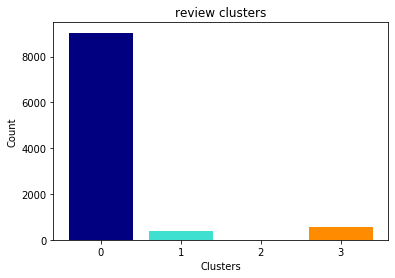

In [43]:


color_iter = ['navy', 'turquoise', 'cornflowerblue','darkorange']

plt.bar(dt_plt['Cluster'], dt_plt['count'],  color=color_iter )
plt.xlabel('Clusters')
plt.xticks(dt_plt['Cluster'])
plt.ylabel('Count')
plt.title('review clusters')
plt.show()

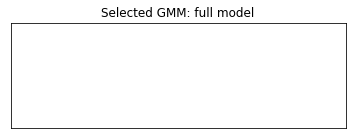

In [41]:


color_iter = itertools.cycle(['navy', 'turquoise', 'cornflowerblue',
                              'darkorange'])

splot = plt.subplot(2, 1, 2)
for i, (mean, cov, color) in enumerate(zip(gmm.means_, gmm.covariances_,
                                           color_iter)):
    v, w = linalg.eigh(cov)
    if not np.any(cluster_pos == i):
        continue
    plt.scatter(CS_similarity_pos[cluster_pos == i, 0], CS_similarity_pos[cluster_pos == i, 1], .8, color=color)

    # Plot an ellipse to show the Gaussian component
    angle = np.arctan2(w[0][1], w[0][0])
    angle = 180. * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(.5)
    splot.add_artist(ell)

plt.xticks(())
plt.yticks(())
plt.title('Selected GMM: full model')
#plt.margins(x=-0.2, y=0)         # Values in (-0.5, 0.0) zooms in to center
plt.subplots_adjust(hspace=.35, bottom=.02)
plt.show()

## 5.2 Clustering with Cosine similarity with bi-gram

In [30]:
from sklearn.mixture import GaussianMixture


# em Clustering
start_time = time.time()

gmm = GaussianMixture()
gmm = GaussianMixture(n_components=4)
gmm.fit(CS_similarity_bigram)

print("--- %s seconds ---" % (time.time() - start_time))

--- 2845.109628677368 seconds ---


In [31]:
cluster_ngram = gmm.predict(CS_similarity_bigram)

cluster_ngram[:10]

array([2, 2, 3, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [34]:
#plot clustering result
dt_plt = pd.DataFrame({'Cluster':cluster_ngram})
dt_plt = dt_plt.groupby('Cluster')['Cluster'].count()

In [35]:
dt_plt

Cluster
0       2
1     307
2    8245
3    1446
Name: Cluster, dtype: int64

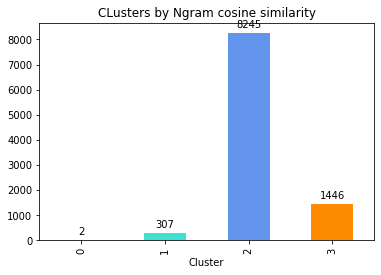

In [86]:
color_iter = ['navy', 'turquoise', 'cornflowerblue','darkorange']

dt_plt.plot(kind ='bar', color = color_iter)
for x,y in zip(dt_plt.index, dt_plt):
    plt.annotate('{}'.format(y ),
                 xy=(x , y + 10),
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords="offset points",
                 ha='center', va='bottom')
plt.title('CLusters by Ngram cosine similarity')
plt.show()

## 5.3 Evaluation & Integration cluster label with behavioral features

### b. Integrate data

In [44]:
df_pos=pd.concat([behavior_attr,
                 pd.DataFrame({'cluster':cluster_pos}).reindex(behavior_attr.index),
                 pd.DataFrame({'polarity':polarity}).reindex(behavior_attr.index),
                 pd.DataFrame({'subjective':subjective}).reindex(behavior_attr.index)],
                 #pd.DataFrame(CS_similarity_bigram).reindex(behavior_attr.index)], 
                 axis=1) 
# df_ngram=pd.concat([behavior_attr,
#                  pd.DataFrame({'cluster':cluster_ngram}).reindex(behavior_attr.index),
#                  pd.DataFrame({'polarity':polarity}).reindex(behavior_attr.index),
#                  pd.DataFrame({'subjective':subjective}).reindex(behavior_attr.index)],
#                  #pd.DataFrame(CS_similarity_bigram).reindex(behavior_attr.index)], 
#                  axis=1) 

In [59]:
df_pos.head(10)

,reviewrating,reusefulcount,recoolcount,refunnycount,friendcount,fancount,tipcount,reviewcount,firstcount,usefulcount,...,pricerange,monmembership,firstreview,maxReviewDay,avgReviewDay,avgpostedrating,avgreviewlen,cluster,polarity,subjective
0,5,0,0,0,16,7,4,178,0,147,...,2,37,0,14,2,3,841,2,0.166667,0.544167
1,5,0,0,0,1,0,0,5,1,2,...,4,10,0,3,1,4,480,3,0.438095,0.637619
2,1,2,0,1,0,0,0,5,0,2,...,2,2,0,2,1,3,189,0,-0.400000,0.600000
3,5,0,0,0,0,0,1,2,0,1,...,2,20,0,2,1,3,494,0,0.290741,0.585185
4,5,0,0,0,1,0,0,153,34,303,...,3,29,0,8,1,3,992,3,0.194271,0.484028
5,4,0,0,0,44,0,0,42,1,17,...,2,35,0,13,4,4,523,0,0.343750,0.542361
6,5,0,0,0,23,6,95,297,27,162,...,2,18,0,22,3,4,407,1,0.270000,0.620000
7,2,1,0,0,0,3,0,111,0,63,...,3,17,0,6,1,3,433,3,0.188889,0.551852
8,5,0,1,0,14,1,0,61,4,60,...,2,1,0,4,1,3,1281,2,0.306861,0.538774
9,5,3,4,2,402,93,0,1158,662,3482,...,1,62,0,37,3,3,544,0,0.217500,0.517500


# 6 Building classify model

In [45]:
import statsmodels.api as sm

X = df_pos
y = Y


def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)



C:\Users\quoch\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\quoch\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  monmembership                  with p-value 0.0
Add  maxReviewDay                   with p-value 1.55538e-171
Add  reusefulcount                  with p-value 7.02141e-60
Add  avgReviewDay                   with p-value 3.78307e-46
Add  complimentcount                with p-value 6.54673e-26
Add  avgreviewlen                   with p-value 2.06106e-25
Add  reviewrating                   with p-value 1.97338e-16
Add  avgpostedrating                with p-value 4.54867e-10
Add  recoolcount                    with p-value 5.07618e-11
Add  tipcount                       with p-value 5.80929e-09
Add  buscateg                       with p-value 5.66487e-06
Add  polarity                       with p-value 2.76932e-05
Add  fancount                       with p-value 0.000579701
Add  firstreview                    with p-value 0.000937372
Add  subjective                     with p-value 0.00141262
Add  cluster                        with p-value 0.00324517
resulting features:
['monmembersh

In [116]:
df_filtered = df_pos[['monmembership', 'maxReviewDay', 'reusefulcount', 'avgReviewDay', 'complimentcount', 'avgreviewlen', 'reviewrating', 'avgpostedrating', 'recoolcount', 'tipcount', 'buscateg', 'polarity', 'fancount', 'firstreview', 'subjective', 'cluster']]

## 6.1 Svm model
### a. Pos similarity

In [46]:
# entire dataset
# test building classify model with consine similarity
# we can split the featuresets into training and testing datasets using sklearn
from sklearn import model_selection
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.svm import SVC
from sklearn import metrics

# split the data into training and testing datasets
 

In [47]:
# standardize the independent variable
def fit_SVM_(X,Y, kernel ='rbf'):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=138) 
    scaler = StandardScaler()  
    scaler.fit(X)
    X_train = scaler.transform(X_train)  
    X_test = scaler.transform(X_test)
    # SVM kernel: ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed
    svclassifier = SVC(kernel='rbf')    	## Linear SVM
    svclassifier.fit(X_train, y_train)  
    y_pred = svclassifier.predict(X_test)  	## predict test set
    print(metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Error rate:", 1-metrics.accuracy_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))


In [48]:
import time
start_time = time.time()

fit_SVM_(df_pos,Y, kernel ='rbf')

print("--- %s seconds ---" % (time.time() - start_time))


[[800 205]
 [ 90 905]]
Accuracy: 0.8525
Error rate: 0.14749999999999996
Recall: 0.9095477386934674
Precision: 0.8153153153153153
--- 2.0465786457061768 seconds ---


In [115]:
import time
start_time = time.time()

fit_SVM_(df_pos,Y, kernel ='rbf')

print("--- %s seconds ---" % (time.time() - start_time))


[[786 219]
 [ 54 941]]
Accuracy: 0.8635
Error rate: 0.13649999999999995
Recall: 0.9457286432160804
Precision: 0.8112068965517242
--- 2.1093623638153076 seconds ---


In [70]:
#cluster 0
df_cluster0 = df_pos[df_pos['cluster'] == 0]
Y = pd.Series(Y)
fit_SVM_(df_cluster0,Y.iloc[df_cluster0.index], kernel ='rbf')

[[244  82]
 [ 24 338]]
Accuracy: 0.8459302325581395
Error rate: 0.15406976744186052
Recall: 0.9337016574585635
Precision: 0.8047619047619048


In [46]:
#cluster 1
df_cluster0 = df_pos[df_pos['cluster'] == 1]
Y = pd.Series(Y)
fit_SVM_(df_cluster0,Y.iloc[df_cluster0.index], kernel ='rbf')

[[250  81]
 [ 19 372]]
Accuracy: 0.8614958448753463
Error rate: 0.13850415512465375
Recall: 0.9514066496163683
Precision: 0.8211920529801324


In [47]:
#cluster 2
df_cluster0 = df_pos[df_pos['cluster'] == 2]
Y = pd.Series(Y)
fit_SVM_(df_cluster0,Y.iloc[df_cluster0.index], kernel ='rbf')

[[195  22]
 [ 18 140]]
Accuracy: 0.8933333333333333
Error rate: 0.10666666666666669
Recall: 0.8860759493670886
Precision: 0.8641975308641975


In [48]:
#cluster 3
df_cluster0 = df_pos[df_pos['cluster'] == 3]
Y = pd.Series(Y)
fit_SVM_(df_cluster0,Y.iloc[df_cluster0.index], kernel ='rbf')

[[114  22]
 [  6  74]]
Accuracy: 0.8703703703703703
Error rate: 0.12962962962962965
Recall: 0.925
Precision: 0.7708333333333334


### b. Bigram

In [52]:
import time
start_time = time.time()

fit_SVM_(df_ngram,Y, kernel ='rbf')

print("--- %s seconds ---" % (time.time() - start_time))


[[799 206]
 [ 70 925]]
Accuracy: 0.862
Error rate: 0.138
Recall: 0.9296482412060302
Precision: 0.8178603006189213
--- 2.4778003692626953 seconds ---


In [55]:
#cluster 1
df_cluster0 = df_ngram[df_ngram['cluster'] == 1]
Y = pd.Series(Y)
fit_SVM_(df_cluster0,Y.iloc[df_cluster0.index], kernel ='rbf')

[[10  7]
 [ 0 45]]
Accuracy: 0.8870967741935484
Error rate: 0.11290322580645162
Recall: 1.0
Precision: 0.8653846153846154


In [56]:
#cluster 2
df_cluster0 = df_ngram[df_ngram['cluster'] == 2]
Y = pd.Series(Y)
fit_SVM_(df_cluster0,Y.iloc[df_cluster0.index], kernel ='rbf')

[[679 152]
 [ 67 751]]
Accuracy: 0.8671922377198302
Error rate: 0.13280776228016977
Recall: 0.9180929095354523
Precision: 0.831672203765227


In [57]:
#cluster 3
df_cluster0 = df_ngram[df_ngram['cluster'] == 3]
Y = pd.Series(Y)
fit_SVM_(df_cluster0,Y.iloc[df_cluster0.index], kernel ='rbf')

[[106  24]
 [ 19 141]]
Accuracy: 0.8517241379310345
Error rate: 0.14827586206896548
Recall: 0.88125
Precision: 0.8545454545454545


## 6.3 Random Forest Classifiers

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel

In [50]:

def RF_selction(X,Y):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=138) 
    sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
    sel.fit(X_train, y_train)
    sel.get_support()
    selected_feat= X_train.columns[(sel.get_support())]
    print(len(selected_feat))
    print(selected_feat)


In [51]:
RF_selction(df_pos,Y)

8
Index(['reusefulcount', 'friendcount', 'reviewcount', 'usefulcount',
       'coolcount', 'funnycount', 'monmembership', 'avgreviewlen'],
      dtype='object')


In [52]:
def RF_classifier(X,Y, 
                  max_features_= 'auto', 
                  n_estimators_ = 100,
                  max_depth_ = None,
                  min_sample_leaf_ = 2):
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=138) 
    clf = RandomForestClassifier(max_features = max_features_, 
                                 n_estimators = n_estimators_,
                                 max_depth = max_depth_,
                                 min_samples_leaf = min_sample_leaf_)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)  	## predict test set
    print(metrics.confusion_matrix(y_test, y_pred))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Error rate:", 1-metrics.accuracy_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))

In [53]:
RF_classifier(df_pos,Y,n_estimators_=100,min_sample_leaf_= 2, max_depth_ = 50)

[[894 111]
 [ 66 929]]
Accuracy: 0.9115
Error rate: 0.08850000000000002
Recall: 0.9336683417085427
Precision: 0.8932692307692308


In [56]:
#cluster 0
df_cluster0 = df_pos[df_pos['cluster'] == 0]
Y = pd.Series(Y)
RF_classifier(df_cluster0,Y.iloc[df_cluster0.index],n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100)

[[282  44]
 [ 24 338]]
Accuracy: 0.9011627906976745
Error rate: 0.09883720930232553
Recall: 0.9337016574585635
Precision: 0.8848167539267016


In [53]:
#cluster 1
df_cluster0 = df_pos[df_pos['cluster'] == 1]
Y = pd.Series(Y)
RF_classifier(df_cluster0,Y.iloc[df_cluster0.index],n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100)

[[290  41]
 [ 19 372]]
Accuracy: 0.9168975069252078
Error rate: 0.08310249307479223
Recall: 0.9514066496163683
Precision: 0.9007263922518159


In [54]:
#cluster 2
df_cluster0 = df_pos[df_pos['cluster'] == 2]
Y = pd.Series(Y)
RF_classifier(df_cluster0,Y.iloc[df_cluster0.index],n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100)

[[201  16]
 [ 12 146]]
Accuracy: 0.9253333333333333
Error rate: 0.07466666666666666
Recall: 0.9240506329113924
Precision: 0.9012345679012346


In [55]:
#cluster 3
df_cluster0 = df_pos[df_pos['cluster'] == 3]
Y = pd.Series(Y)
RF_classifier(df_cluster0,Y.iloc[df_cluster0.index],n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100)

[[122  14]
 [  4  76]]
Accuracy: 0.9166666666666666
Error rate: 0.08333333333333337
Recall: 0.95
Precision: 0.8444444444444444


In [57]:
# withou cluster
RF_classifier(df_pos.drop('cluster',axis=1),Y,n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100 )

[[889 116]
 [ 36 959]]
Accuracy: 0.924
Error rate: 0.07599999999999996
Recall: 0.963819095477387
Precision: 0.892093023255814


In [58]:
# withou text generated features
RF_classifier(df_pos.drop(['cluster','polarity','subjective'],axis=1),Y,n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100 )

[[882 123]
 [ 39 956]]
Accuracy: 0.919
Error rate: 0.08099999999999996
Recall: 0.9608040201005025
Precision: 0.8860055607043559


### b. Bigram

In [60]:
RF_classifier(df_ngram,Y,n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100 )

[[895 110]
 [ 40 955]]
Accuracy: 0.925
Error rate: 0.07499999999999996
Recall: 0.9597989949748744
Precision: 0.8967136150234741


In [61]:
#cluster 1
df_cluster0 = df_ngram[df_ngram['cluster'] == 1]
Y = pd.Series(Y)
RF_classifier(df_cluster0,Y.iloc[df_cluster0.index],n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100)

[[10  7]
 [ 0 45]]
Accuracy: 0.8870967741935484
Error rate: 0.11290322580645162
Recall: 1.0
Precision: 0.8653846153846154


In [62]:
#cluster 2
df_cluster0 = df_ngram[df_ngram['cluster'] == 2]
Y = pd.Series(Y)
RF_classifier(df_cluster0,Y.iloc[df_cluster0.index],n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100)

[[731 100]
 [ 42 776]]
Accuracy: 0.9138872043662826
Error rate: 0.08611279563371743
Recall: 0.9486552567237164
Precision: 0.8858447488584474


In [63]:
#cluster 2
df_cluster0 = df_ngram[df_ngram['cluster'] == 3]
Y = pd.Series(Y)
RF_classifier(df_cluster0,Y.iloc[df_cluster0.index],n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100)

[[112  18]
 [  4 156]]
Accuracy: 0.9241379310344827
Error rate: 0.07586206896551728
Recall: 0.975
Precision: 0.896551724137931


In [65]:
# withou cluster
RF_classifier(df_ngram.drop('cluster',axis=1),Y,n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100 )

[[890 115]
 [ 41 954]]
Accuracy: 0.922
Error rate: 0.07799999999999996
Recall: 0.9587939698492463
Precision: 0.892422825070159


In [66]:
# withou text generated features
RF_classifier(df_ngram.drop(['cluster','polarity','subjective'],axis=1),Y,n_estimators_=150,min_sample_leaf_= 2, max_depth_ = 100 )

[[894 111]
 [ 40 955]]
Accuracy: 0.9245
Error rate: 0.07550000000000001
Recall: 0.9597989949748744
Precision: 0.8958724202626641


## 6.3 Neural Network

### a. NN with pos similarity

In [60]:
from sklearn.neural_network import MLPClassifier

In [61]:
def NN_classifier(X, Y, hidden_layers_ = (5,2), activation_ ='relu',solver_ ='adam' , alphafloat_ =1e-5):

    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=138)

    clf = MLPClassifier(solver=solver_,
                        alpha=alphafloat_,
                        activation =activation_,
                        hidden_layer_sizes= hidden_layers_,
                        random_state=1)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    cm =  metrics.confusion_matrix(y_test, y_pred)
    print(cm)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    print("Error rate:", 1-metrics.accuracy_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['0','1']
    plt.title('NN Confusion Matrix - Test Data')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames, rotation=45)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()

[[838 167]
 [ 72 923]]
Accuracy: 0.8805
Error rate: 0.11950000000000005
Recall: 0.9276381909547738
Precision: 0.846788990825688


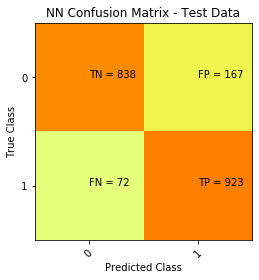

In [63]:
NN_classifier(df_pos,Y,hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh' )

[[276  50]
 [ 46 316]]
Accuracy: 0.8604651162790697
Error rate: 0.13953488372093026
Recall: 0.8729281767955801
Precision: 0.8633879781420765


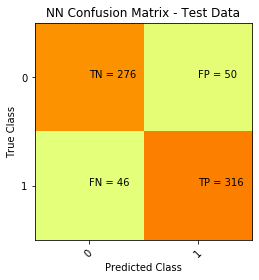

In [65]:
#cluster 0
df_cluster0 = df_pos[df_pos['cluster'] == 0]
Y = pd.Series(Y)
NN_classifier(df_cluster0,Y.iloc[df_cluster0.index],hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh' )

[[289  42]
 [ 48 343]]
Accuracy: 0.8753462603878116
Error rate: 0.1246537396121884
Recall: 0.8772378516624041
Precision: 0.8909090909090909


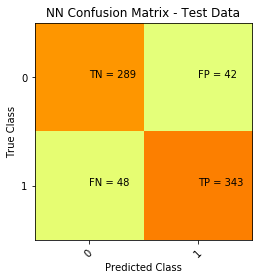

In [64]:
#cluster 1
df_cluster0 = df_pos[df_pos['cluster'] == 1]
Y = pd.Series(Y)
NN_classifier(df_cluster0,Y.iloc[df_cluster0.index],hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh' )

[[197  20]
 [ 16 142]]
Accuracy: 0.904
Error rate: 0.09599999999999997
Recall: 0.8987341772151899
Precision: 0.8765432098765432


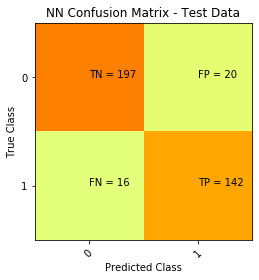

In [67]:
#cluster 2
df_cluster0 = df_pos[df_pos['cluster'] == 2]
Y = pd.Series(Y)
NN_classifier(df_cluster0,Y.iloc[df_cluster0.index],hidden_layers_ =(20,20,20,30), solver_='adam', activation_= 'tanh' )

[[117  19]
 [ 13  67]]
Accuracy: 0.8518518518518519
Error rate: 0.14814814814814814
Recall: 0.8375
Precision: 0.7790697674418605


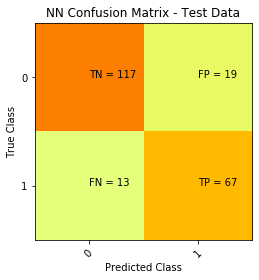

In [68]:
#cluster 3
df_cluster0 = df_pos[df_pos['cluster'] == 3]
Y = pd.Series(Y)
NN_classifier(df_cluster0,Y.iloc[df_cluster0.index],hidden_layers_ =(20,20,20,30), solver_='adam', activation_= 'tanh' )

### b NN with bigram

[[833 172]
 [ 56 939]]
Accuracy: 0.886
Error rate: 0.11399999999999999
Recall: 0.9437185929648241
Precision: 0.8451845184518452


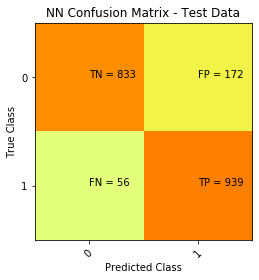

In [72]:
NN_classifier(df_ngram,Y,hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh' )

[[ 9  8]
 [ 1 44]]
Accuracy: 0.8548387096774194
Error rate: 0.14516129032258063
Recall: 0.9777777777777777
Precision: 0.8461538461538461


C:\Users\quoch\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


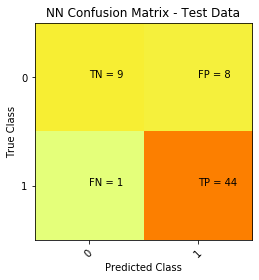

In [77]:
#cluster 1
df_cluster0 = df_ngram[df_ngram['cluster'] == 1]
Y = pd.Series(Y)
NN_classifier(df_cluster0.drop('cluster',axis=1),Y.iloc[df_cluster0.index],hidden_layers_ =(20,20,20,30), solver_='adam', activation_= 'tanh' )

[[686 145]
 [ 71 747]]
Accuracy: 0.8690115221346271
Error rate: 0.13098847786537293
Recall: 0.91320293398533
Precision: 0.8374439461883408


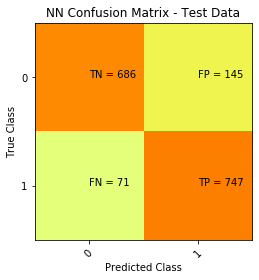

In [78]:
#cluster 2
df_cluster0 = df_ngram[df_ngram['cluster'] == 2]
Y = pd.Series(Y)
NN_classifier(df_cluster0.drop('cluster',axis=1),Y.iloc[df_cluster0.index],hidden_layers_ =(20,20,20,30), solver_='adam', activation_= 'tanh' )

[[107  23]
 [ 17 143]]
Accuracy: 0.8620689655172413
Error rate: 0.13793103448275867
Recall: 0.89375
Precision: 0.8614457831325302


C:\Users\quoch\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


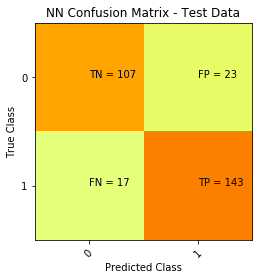

In [79]:
#cluster 2
df_cluster0 = df_ngram[df_ngram['cluster'] == 3]
Y = pd.Series(Y)
NN_classifier(df_cluster0.drop('cluster',axis=1),Y.iloc[df_cluster0.index],hidden_layers_ =(20,20,20,30), solver_='adam', activation_= 'tanh' )

[[798 207]
 [ 40 955]]
Accuracy: 0.8765
Error rate: 0.12350000000000005
Recall: 0.9597989949748744
Precision: 0.8218588640275387


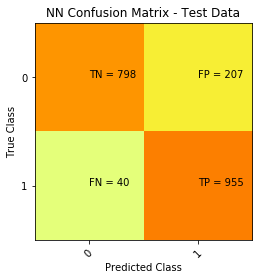

In [85]:
# withou cluster
NN_classifier(df_ngram.drop('cluster',axis=1),Y,hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh')

[[823 182]
 [ 67 928]]
Accuracy: 0.8755
Error rate: 0.12450000000000006
Recall: 0.9326633165829146
Precision: 0.836036036036036


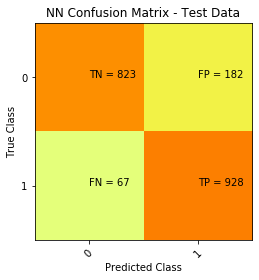

In [84]:
# withou cluster
NN_classifier(df_ngram.drop(['cluster','polarity','subjective'],axis=1),Y,hidden_layers_ =(20,30,40,50), solver_='adam', activation_= 'tanh')

### z. Feed Forward Neural Network

In [168]:
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras.utils import to_categorical


In [170]:
# construct a neural network

# Set the number of features we want
number_of_features = len(df_pos.columns)

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=2, activation='relu', input_shape=(number_of_features,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=2, activation='relu'))

# Add fully connected layer with a softmax activation function
network.add(layers.Dense(units=2, activation='softmax'))

# Compile neural network
network.compile(loss='categorical_crossentropy', # Cross-entropy
                optimizer='rmsprop', # Root Mean Square Propagation
                metrics=['accuracy']) # Accuracy performance metric

In [171]:
# Train neural network
y_binary = to_categorical(Y)

X_train, X_test, y_train, y_test = train_test_split(df_pos, y_binary, test_size=0.20,random_state=138) 
scaler = StandardScaler()  
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

history = network.fit(X_train, # Features
                      y_train, # Target vector
                      epochs=3, # Three epochs
                      verbose=0, # No output
                      batch_size=100, # Number of observations per batch
                      validation_data=(X_test, y_test)) # Data to use for evaluation

In [173]:
y_predict = network.predict(X_test)

In [177]:
_, accuracy = network.evaluate(x=X_test, y=y_test  )
print('Accuracy: %.2f' % (accuracy*100))

2000/2000 [==============================] - 0s 26us/step
Accuracy: 72.40


In [ ]:
#### fit model
# Train neural network
def FNN_classifier():
    history = network.fit(train_features, # Features
                          train_target, # Target vector
                          epochs=3, # Three epochs
                          verbose=0, # No output
                          batch_size=100, # Number of observations per batch
                          validation_data=(test_features, test_target)) # Data to use for evaluation

## 6.XXXNB model with TF-IDF

In [360]:
# test SVM model with different way
# split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(df_pos, Y, test_size=0.20,random_state=109)  

In [363]:
import time
from sklearn.naive_bayes import MultinomialNB
start_time = time.time()
scaler = StandardScaler()  
scaler.fit(df_pos)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

clf = MultinomialNB().fit(X_train, y_train)
y_pred = clf.predict(X_test)



ValueError: Input X must be non-negative

In [44]:
print(metrics.accuracy_score(y_pred=y_pred, y_true=y_test))

0.599


In [45]:
type(X_train)

scipy.sparse.csr.csr_matrix

# ##### Model 2: using combination Text and non-text features

# using mapper to map features to dataframe
mapper = DataFrameMapper([
     ('description', TfidfVectorizer()),
     ('nb_like', None),
     ('picture_labels', TfidfVectorizer()),
     ('nb_share', None),
     ('user', None),
     ('month', None),
     ('day', None),
     ('hour', None),
 ])

In [222]:
from sklearn_pandas import DataFrameMapper, cross_val_score
from sklearn.metrics import classification_report
import sklearn.ensemble as sk

In [223]:
def printreport(exp, pred):
    print(pd.crosstab(exp, pred, rownames=['Actual'], colnames=['Predicted']))

    print('\n \n')
    print(classification_report(exp, pred))


In [261]:
data2 = df[['rating', 'usefulCount','coolCount','funnyCount']].copy()

data2['reviewContent'] = processed
data2['sentiment'] =sent_analysis

In [225]:
type(CS_similarity)

numpy.ndarray

In [269]:
print(data2.index)

RangeIndex(start=0, stop=5000, step=1)


In [243]:
X_tfidf= tfidf.fit_transform(data2['reviewContent'])

In [263]:
mapper = DataFrameMapper([
     ('rating', None),
     ('usefulCount', None),
     ('coolCount', None),
     ('funnyCount', None),
     ('reviewContent', TfidfVectorizer()),
     ('sentiment', None)
     #('reviewContent', [CountVectorizer(analyzer='word', ngram_range=(2, 2)),TfidfVectorizer()])

 ])

In [264]:
features = mapper.fit_transform(data2)

In [250]:
features.shape

(5000, 16985)

In [252]:
#integrate cosine similarity into features
features=np.concatenate((features, CS_similarity), axis=1)

In [253]:
features.shape

(5000, 21985)

In [265]:
# Split the data between train and test
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.20,random_state=109)  

start_time = time.time()
clf = sk.RandomForestClassifier(random_state=0, n_estimators=70)
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)

printreport(y_test, predicted)
print("--- %s seconds ---" % (time.time() - start_time))

Predicted    0   1
Actual            
0          532  72
1          318  78

 

              precision    recall  f1-score   support

           0       0.63      0.88      0.73       604
           1       0.52      0.20      0.29       396

    accuracy                           0.61      1000
   macro avg       0.57      0.54      0.51      1000
weighted avg       0.58      0.61      0.56      1000

--- 31.03861355781555 seconds ---


In [266]:
print(metrics.accuracy_score(y_pred=predicted, y_true=y_test))

0.61
